In [12]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig

In [13]:
#FIRST STEP:OPEN THE DATASET -> for this step I read the latest csv created in the previous pipelane, as we need all the periods.

rfm_df= pd.read_csv('/home/jovyan/A_Dataset_Graph/pipeline_3_output/date_selector_rfm_2016.12.csv_rw.csv_scored.csv', dtype={'year_month':object})

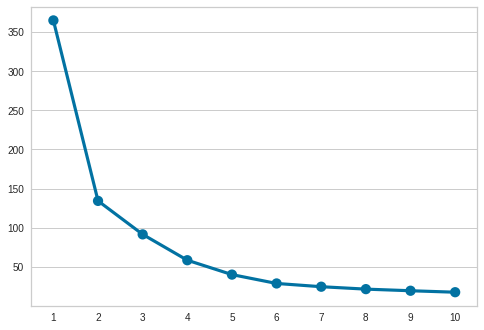


The best number of K-Means Clusters is:  4

Silhouette plot for dataset at k=  4



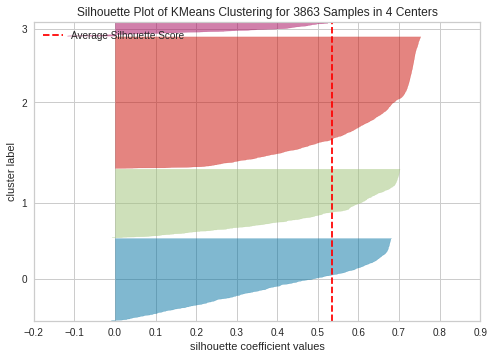


Clusters plot nomalized RFM Values for K=  4



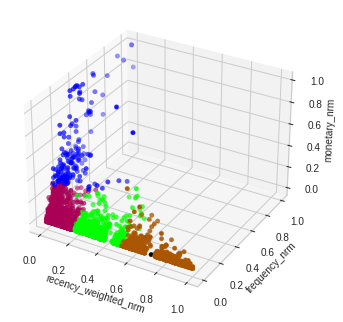

In [15]:
#SECOND STEP:VISUALIZE CLUSTERS WITH NORMAIZED RFM VALUES
#NORMALIZATION PROCESS: for the recency_weighted frequency and monetary value we previusly apply MinMaxScaler() 

scaler = MinMaxScaler()
rfm_value_sel = rfm_df.iloc[:, 2:5]
#rfm_value_sel = rfm_df.iloc[:, ['recency_weighted', 'frequency', 'monetary']]

rfm_value_sel_nrm = pd.DataFrame(scaler.fit_transform(rfm_value_sel))
rfm_value_sel_nrm.columns = ['recency_weighted', 'frequency', 'monetary']


#SEARCHING FOR THE RIGHT NUMBER OF CLUSTERS

SSE_rated= []
for k in range (0,10):
    kmeans = KMeans(n_clusters=k+1, random_state=1231).fit(rfm_value_sel_nrm.iloc[:, 0:3])
    SSE_rated.append(kmeans.inertia_)
sns.pointplot(x=list(range(1,11)), y=SSE_rated)
plt.show(sns)
 
#BEWARE OF THE WEIGHTING VALUE IN LINE 'if result < (result_rate-(result_rate*0.4)):'
#IF NEEDED COULD BE RAISED OR LOWER TO GET THE RIGHT NUMBER OF K CLUSTER
result_count = 0
result_rate = 0
for result in SSE_rated:
    if result_count == 0:
        result_count = result_count+1
        result_rate = result
    if result_count > 0:
        if result < (result_rate-(result_rate*0.4)):
            result_count = result_count + 1
            result_rate= result

print()
print ("The best number of K-Means Clusters is: ", result_count)


#ANALYZE THE SILHOUETTE 

print('')
print('Silhouette plot for dataset at k= ', result_count)
print('')
visualizer_scored = SilhouetteVisualizer(KMeans(result_count, random_state=42), colors='yellowbrick')
visualizer_scored.fit(rfm_value_sel_nrm.iloc[:, 0:3])
visualizer_scored.show()  
   

#VISUALIZE THE CLUSTERS
print('')
print('Clusters plot nomalized RFM Values for K= ', result_count)
print('')
model_rfm_nrm = KMeans(n_clusters=result_count, random_state=1231).fit(rfm_value_sel_nrm.iloc[:, 0:3])
centers = model_rfm_nrm.cluster_centers_
fig = plt.figure()
ax =fig.add_subplot(111, projection="3d")
ax.scatter(rfm_value_sel_nrm['recency_weighted'], rfm_value_sel_nrm['frequency'], rfm_value_sel_nrm['monetary'], cmap='brg', c=model_rfm_nrm.predict(rfm_value_sel_nrm.iloc[:, 0:3]))
ax.scatter(centers[:, 0], centers[:, 1], c='black');
ax.set_xlabel('recency_weighted_nrm', fontsize=10)
ax.set_ylabel('frequency_nrm',fontsize=10)
ax.set_zlabel('monetary_nrm', fontsize=10)    
plt.show()
fig.savefig('/home/jovyan/A_Dataset_Graph/Graph/' + 'Clusters plot nomalized RFM Values.png')
plt.close()

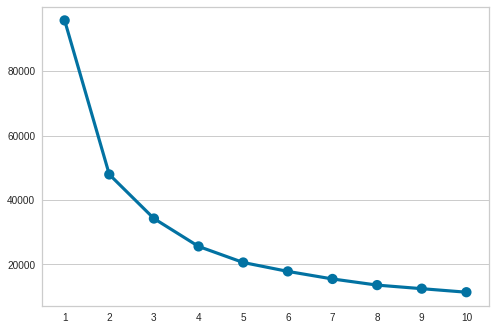


The best number of K-Means Clusters is:  4


In [16]:
#FOURTH STEP:VISUALIZE CLUSTERS WITH RFM SCORES

#SEARCHING FOR THE RIGHT NUMBER OF CLUSTERS USING SCORES
SSE_rated= []
for k in range (0,10):
    kmeans = KMeans(n_clusters=k+1, random_state=1231).fit(rfm_df.iloc[:, 9:12])
    SSE_rated.append(kmeans.inertia_)
sns.pointplot(x=list(range(1,11)), y=SSE_rated)
plt.show(sns)
 
#BEWARE OF THE WEIGHTING VALUE IN LINE 'if result < (result_rate-(result_rate*0.4)):'
#IF NEEDED COULD BE RAISED OR LOWER TO GET THE RIGHT NUMBER OF K CLUSTER
result_count = 0
result_rate = 0
for result in SSE_rated:
    if result_count == 0:
        result_count = result_count+1
        result_rate = result
    if result_count > 0:
        if result < (result_rate-(result_rate*0.4)):
            result_count = result_count + 1
            result_rate= result

print()
print ("The best number of K-Means Clusters is: ", result_count)


Silhouette plot for dataset at k=  4



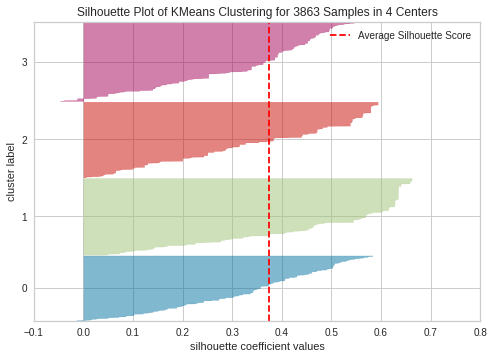

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3863 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
#ANALYZE THE SILHOUETTE 

print('')
print('Silhouette plot for dataset at k= ', result_count)
print('')
visualizer_scored = SilhouetteVisualizer(KMeans(result_count, random_state=42), colors='yellowbrick')
visualizer_scored.fit(rfm_df.iloc[:, 9:12])
visualizer_scored.show()  


Clusters plot of RFM Scores at k=  4



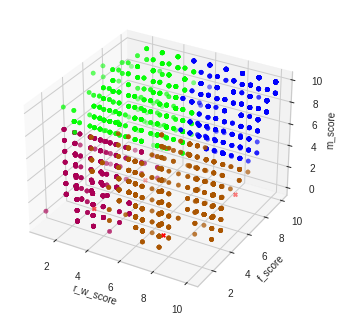

In [18]:
#VISUALIZE THE CLUSTERS
   
print('')
print('Clusters plot of RFM Scores at k= ', result_count)
print('')
model_scores = KMeans(n_clusters=result_count, random_state=1231).fit(rfm_df.iloc[:, 9:12])
centers = model_scores.cluster_centers_
fig = plt.figure()
ax =fig.add_subplot(111, projection="3d")
ax.scatter(rfm_df['r_w_score'], rfm_df['f_score'], rfm_df['m_score'], cmap='brg', c=model_scores.predict(rfm_df.iloc[:, 9:12]))
ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='X');
ax.set_xlabel('r_w_score', fontsize=10)
ax.set_ylabel('f_score',fontsize=10)
ax.set_zlabel('m_score', fontsize=10)
plt.show()
fig.savefig('/home/jovyan/A_Dataset_Graph/Graph/' + 'Clusters plot of RFM Scores' + '.png')



Clusters plot for scores:



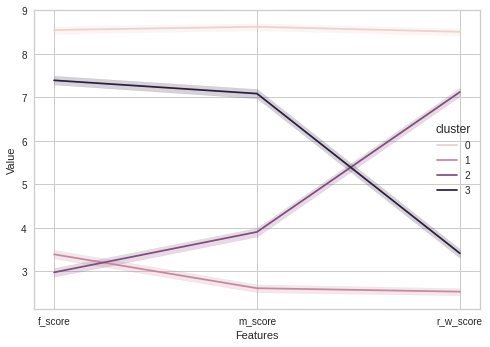

In [19]:
#ANALIZE CLUSTRS TRENDS
temp_rfm_df_scores=rfm_df
temp_rfm_df_scores['cluster'] = model_scores.labels_

melted_temp_rfm_df_scores =pd.melt(temp_rfm_df_scores.reset_index(),
                                    id_vars=['user_id', 'cluster'],
                                    value_vars=['f_score', 'm_score', 'r_w_score'],
                                    var_name='Features',
                                    value_name='Value')

print('')
print('Clusters plot for scores:')
print('')
image = sns.lineplot(x='Features', y='Value', hue='cluster', data = melted_temp_rfm_df_scores)
figure = image.get_figure()
figure.savefig('/home/jovyan/A_Dataset_Graph/Graph/' + 'Clusters plot for scores.png')

In [21]:
temp_rfm_df_scores.to_csv('/home/jovyan/A_Dataset_Graph/pipeline_4_output/rfm_clustered.csv', index=False)

In [22]:
#CREATE E STATISTIC SUMMARY FOR EACH CLUSTER 

report=temp_rfm_df_scores.groupby('cluster').agg({
    'recency':['mean', 'min', 'max'],
    'recency_weighted':['mean', 'min', 'max'],
    'frequency':['mean', 'min', 'max'],
    'monetary':['mean', 'min', 'max'],
    'response':['mean', 'min', 'max', 'count']})

print(report)

            recency           recency_weighted             frequency             monetary                  response              
               mean  min  max             mean  min   max       mean min  max        mean    min      max      mean min max count
cluster                                                                                                                          
0         55.789421    1  263        80.935130    1   473  13.201597   1  143  489.583313  39.26  3323.17  0.515968   0   1  1002
1        460.342770  192  727       940.516684  345  1599   1.074823   1    8   23.845228   0.00   121.00  0.008089   0   1   989
2        111.543860    1  348       180.063353    1   626   1.125731   1    3   39.478782   0.00   437.71  0.060429   0   1  1026
3        372.039007  128  724       733.249409  204  1592   5.111111   1   53  166.298972   0.00  3323.17  0.198582   0   1   846


In [23]:
#verify the correct cluster in the formula below checking in the plot at the following directory: 
#/home/jovyan/Dataset_Graphgraph/Clusters plot for scores.png
#the scores should be binary: 0 for bad customers and churning customers, 1 form good customers and new customers.
#Please note that the above classification is one solution but, according to the corporate marketing purpose could be change 
#if, for instance, the focus is on the churning customers. 

def f(row):
    if row['cluster'] == 0:
        val = 1
    elif row['cluster'] == 2:
        val = 1
    elif row['cluster'] == 1:
        val = 0
    elif row['cluster'] == 3:
        val = 0
    else:
        val = 'check clusters'
    return val

rfm_df= pd.read_csv('/home/jovyan/A_Dataset_Graph/pipeline_4_output/rfm_clustered.csv', dtype={'year_month':object})
rfm_df['target'] = rfm_df.apply(f, axis=1)
rfm_df.to_csv('/home/jovyan/A_Dataset_Graph/pipeline_4_output/rfm_targeted.csv', index=False)

In [24]:
rfm_df.iloc[0:15,:]

,user_id,recency,recency_weighted,frequency,monetary,year_month,active_period,avg_period,response,r_w_score,f_score,m_score,cluster,target
0,4324,337,606,1,0.0,2016.12,0,0,0,4,2,1,1,0
1,4323,337,606,1,0.0,2016.12,0,0,0,4,2,1,1,0
2,4322,337,606,1,0.0,2016.12,0,0,0,4,2,1,1,0
3,4313,338,608,1,0.0,2016.12,0,0,0,4,2,1,1,0
4,2218,298,536,1,0.0,2016.12,0,0,0,4,1,1,1,0
5,4675,294,529,1,0.0,2016.12,0,0,0,4,1,1,1,0
6,4311,338,608,1,0.0,2016.12,0,0,0,4,2,1,1,0
7,5296,205,369,1,0.0,2016.12,0,0,0,5,3,1,1,0
8,741,327,588,1,0.0,2016.12,0,0,0,4,1,1,1,0
9,4306,339,610,1,0.0,2016.12,0,0,0,4,2,1,1,0
